Mean squared error of Decision Tree =  14.79
Explained variance score of Decision Tree =  0.82
Mean squared error of AdaBoost =  7.66
Explained variance score of AdaBoost =  0.91


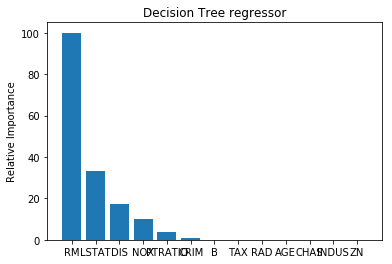

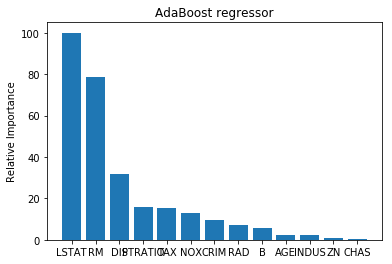

In [4]:
# https://blog.csdn.net/u012967763/article/details/79206304?utm_source=blogxgwz6
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline 
#导入数据
housing_data = datasets.load_boston()
#打乱数据顺序
X, y = shuffle(housing_data.data, housing_data.target, random_state = 7)
#划分数据集,80%数据用于训练，20%数据用于测试
num_training = int(len(X)*0.8)
X_train, X_test = X[:num_training], X[num_training:]
y_train, y_test = y[:num_training], y[num_training:]
#拟合一个决策树回归模型
dt_regressor = DecisionTreeRegressor(max_depth=4)     #选择一个最大深度为4的决策树
dt_regressor.fit(X_train, y_train)
#带AdaBoost算法的决策树回归模型进行拟合
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(X_train, y_train)
 
#评价决策树回归器训练结果
y_predict_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_predict_dt)          #均方差
evs = explained_variance_score(y_test, y_predict_dt)    #解释方差
print('Mean squared error of Decision Tree = ', round(mse, 2))
print('Explained variance score of Decision Tree = ', round(evs, 2))
#评价AdaBoost
y_predict_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_predict_ab)
evs = explained_variance_score(y_test, y_predict_ab)
print('Mean squared error of AdaBoost = ', round(mse, 2))
print('Explained variance score of AdaBoost = ', round(evs, 2))
 
#计算特征的相对重要性
def plot_feature_importances(feature_importances, title, feature_names):
    #将重要性值标准化
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    #将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
 
    #让x轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0]) + 0.5
 
    #画条形图
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align = 'center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()
    return None
 
#作图
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor',
                         housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor',
                         housing_data.feature_names)